In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import csv

In [4]:
dataframe = pd.read_csv('MovieSummaries/movie.metadata.tsv', sep='\t', names = ['Wikipedia MovieID', 'Freebase MovieID', 'Movie name', 'Movie release date', 'Movie Boxoffice Revenue','Movie runtime', 'Movie Languages', 'Movie COuntries', 'Movie genres' ])

# Afficher le tableau
display(dataframe)

,Wikipedia MovieID,Freebase MovieID,Movie name,Movie release date,Movie Boxoffice Revenue,Movie runtime,Movie Languages,Movie COuntries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


In [5]:
#Drop every movie with a NaN as a release date and create a new column Movie release year
dataframe2 = dataframe.copy(deep = True)
dataframe2 = dataframe2.dropna(subset=['Movie release date'])
dataframe2['Movie release Year'] = dataframe2['Movie release date'].str[0:4]
dataframe2['Movie release Year'] = pd.to_numeric(dataframe2['Movie release Year'], errors='raise') #Check si les strings sont autres que des nombres
dataframe2 = dataframe2.sort_values('Movie release Year', ascending=True) #Trier les films par ordre croissant des années

display(dataframe2)

,Wikipedia MovieID,Freebase MovieID,Movie name,Movie release date,Movie Boxoffice Revenue,Movie runtime,Movie Languages,Movie COuntries,Movie genres,Movie release Year
62836,29666067,/m/0fphzrf,Hunting Season,1010-12-02,12160978.0,140.00,"{""/m/02hwyss"": ""Turkish Language"", ""/m/02h40lc...","{""/m/01znc_"": ""Turkey""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/02n4kr"": ""My...",1010
57963,1082508,/m/044ggd,Roundhay Garden Scene,1888,NaN,0.03,"{""/m/06ppq"": ""Silent film""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1888
38764,12170539,/m/02vs8rb,"Leisurely Pedestrians, Open Topped Buses and H...",1889,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/07ssc"": ""United Kingdom""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1889
53907,6431996,/m/0g53t3,"Monkeyshines, No. 1",1890,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}",1890
60249,22770416,/m/0gj9h_4,London's Trafalgar Square,1890,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1890
...,...,...,...,...,...,...,...,...,...,...
51429,25813358,/m/0gmbk1g,Avatar 2,2015,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ...",2015
8307,24179103,/m/0jwx0kc,"I, Robot 2",2015,NaN,NaN,{},{},"{""/m/06n90"": ""Science Fiction""}",2015
64862,3139382,/m/08tyfg,Battle Angel,2016,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2016
30275,27554912,/m/0c03gcc,Kung Fu Panda 3,2016-03-18,NaN,NaN,{},{},{},2016


In [6]:
dataframe2.drop(62836, inplace=True) #Erreur sur la première valeur avec une année de 1010

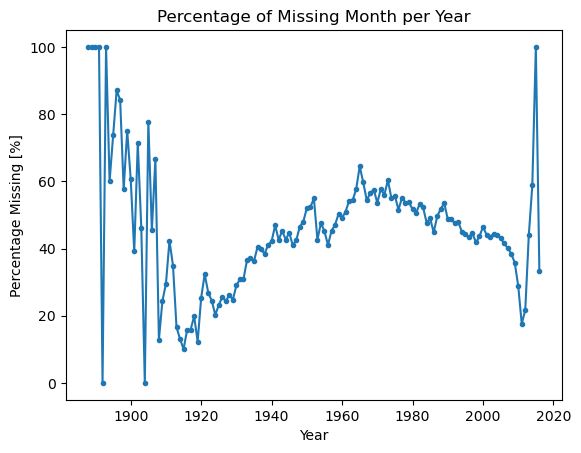

In [64]:
percentage = lambda x: (x.astype(str).apply(len) < 5).mean() * 100

missing_data_percentage = dataframe2.groupby('Movie release Year')['Movie release date'].apply(percentage)


# Use of the plot function to get a line plot
plt.plot(missing_data_percentage.index, missing_data_percentage.values, marker='.')
plt.title('Percentage of Missing Month per Year')
plt.xlabel('Year')
plt.ylabel('Percentage Missing [%]')
plt.show()


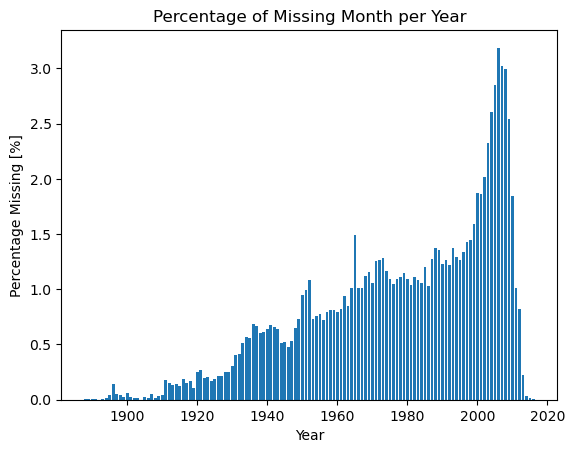

In [63]:
number_of_missing_movie = dataframe2.groupby('Movie release Year')['Movie release Year'].sum()*missing_data_percentage/100

cumulative_percentage = (number_of_missing_movie*100/number_of_missing_movie.sum())

plt.bar(cumulative_percentage.index, cumulative_percentage.values)
plt.title('Percentage of Missing Month per Year')
plt.xlabel('Year')
plt.ylabel('Percentage Missing [%]')
plt.show()


In [8]:
# Convert to numerci the release years and be sure that movies release year are numeric
dataframe2['Movie release Year'] = pd.to_numeric(dataframe2['Movie release Year'], errors='raise')

In [1]:
# Dataframe only with rows where release month is available : df

df = dataframe2.copy(deep = True)
df = df[df['Movie release date'].str.len() > 4]
ratio = len(df)*100/len(dataframe)

print(f"The number of movie with the release month is : {len(df)}\nThe ratio of films with the release month is : {ratio:.2f}%")

NameError: name 'dataframe2' is not defined

In [10]:
# create a column with release month column

df['Movie release Month'] = df['Movie release date'].str[5:7]

#Convert string to int for month
df['Movie release Month'] = pd.to_numeric(df['Movie release Month'], errors='raise') #Check si les strings sont autres que des nombres

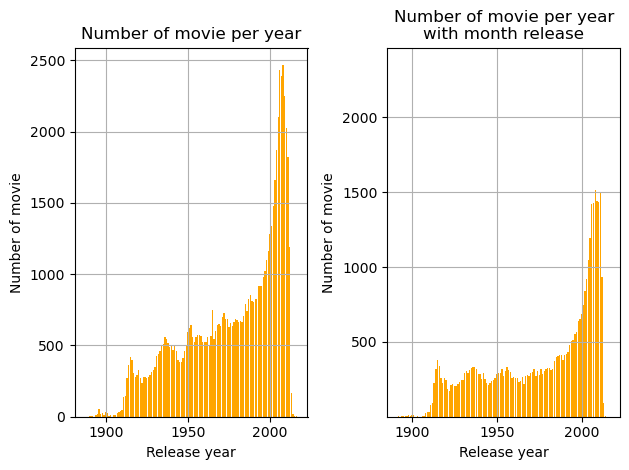

In [11]:
# Counting number of movie per year
film_counts_year = dataframe2['Movie release Year'].value_counts().sort_index()

# Counting number of movie with month release per year
film_counts_year_without_missing_months = df['Movie release Year'].value_counts().sort_index()

# Plot the number of movies per year
plt.subplot(1, 2, 1)

plt.bar(film_counts_year.index, film_counts_year.values, color='orange')
plt.title('Number of movie per year')
plt.xlabel('Release year')
plt.ylabel('Number of movie')
plt.grid()

# Plot the number of movies per year
plt.subplot(1, 2, 2)

plt.bar(film_counts_year_without_missing_months.index, film_counts_year_without_missing_months.values, color='orange')
plt.title('Number of movie per year\nwith month release')
plt.xlabel('Release year')
plt.ylabel('Number of movie')
plt.grid()


# Set the same Y-axis limits for both subplots
plt.ylim(min(min(film_counts_year.values), min(film_counts_year_without_missing_months.values)),
         max(max(film_counts_year.values), max(film_counts_year_without_missing_months.values)))

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Thanks to these barplot we can see that for certain years the number of movie released is not very important. As our study is on the based on 12 months, we think it is important to take into account the years where a minimum a 200 movies was releases.

In [12]:
df2 = df.copy(deep = True)

# Takes out all the years where the number of movies is under 200
years_under_200 = film_counts_year_without_missing_months.index[film_counts_year_without_missing_months.values > 200]
df2 = df2[df2['Movie release Year'].isin(years_under_200)]

print(f"The length of the new dataframe is : {len(df2)}\nOur study will be based on {len(df2)*100/len(dataframe):.2f} % of the complete dataset")


The length of the new dataframe is : 41855
Our study will be based on 51.20 % of the complete dataset


We see that the number of movie after 1980 increases a lot. We will separate the dataframe into two to see if somme analisis are more relevant in these recent years or not.

In [37]:
#Creation of two different datafrale from df2. One with the movies before 1980 and the other one with the movies after 1980

df21 = df2.copy(deep= True)
df22 = df2.copy(deep=True)

df21 = df21[df21['Movie release Year']<1980]
df22 = df22[df22['Movie release Year'] >= 1980]

print(f"Number of Movies before 1980 with runtime a month release available: {len(df21)}\nNumber of movies after 1980 with runtime a month release available: {len(df22)}")

Number of Movies before 1980 with runtime a month release available: 17883
Number of movies after 1980 with runtime a month release available: 23972


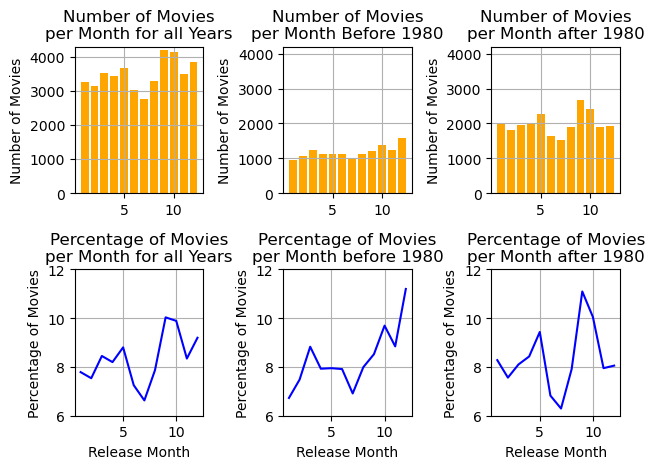

In [33]:
#CODE FOR ALL YEARS

# Counting number of movie per year
film_counts_month = df2['Movie release Month'].value_counts().sort_index()

# Create the first subplot for the bar plot
plt.subplot(2, 3, 1)
plt.bar(film_counts_month.index, film_counts_month.values, color='orange')
plt.title('Number of Movies\nper Month for all Years')
plt.ylabel('Number of Movies')
plt.ylim(0,4300)
plt.grid()

# Create the second subplot for the line plot
plt.subplot(2, 3, 4)
plt.plot(film_counts_month.index, film_counts_month.values * 100 / film_counts_month.values.sum(), color='blue')
plt.title('Percentage of Movies\nper Month for all Years')
plt.xlabel('Release Month')
plt.ylabel('Percentage of Movies')
plt.ylim(6,12)
plt.grid()

#CODE FOR MOVIES BEFORE 1980

# Counting number of movie per year before 1980
film_counts_month_1979 = df21['Movie release Month'].value_counts().sort_index()

# Create the first subplot for the bar plot
plt.subplot(2, 3, 2)
plt.bar(film_counts_month_1979.index, film_counts_month_1979.values, color='orange')
plt.title('Number of Movies\nper Month Before 1980')
plt.ylabel('Number of Movies')
plt.ylim(0,4200)
plt.grid()

# Create the second subplot for the line plot
plt.subplot(2, 3, 5)
plt.plot(film_counts_month_1979.index, film_counts_month_1979.values * 100 / film_counts_month_1979.values.sum(), color='blue')
plt.title('Percentage of Movies\nper Month before 1980')
plt.xlabel('Release Month')
plt.ylabel('Percentage of Movies')
plt.ylim(6,12)
plt.grid()

#CODE FOR MMOVIES AFTER 1980

# Counting number of movie per year before 1980
film_counts_month_1980 = df22['Movie release Month'].value_counts().sort_index()

# Create the first subplot for the bar plot
plt.subplot(2, 3, 3)
plt.bar(film_counts_month_1980.index, film_counts_month_1980.values, color='orange')
plt.title('Number of Movies\nper Month after 1980')
plt.ylabel('Number of Movies')
plt.ylim(0,4200)
plt.grid()

# Create the second subplot for the line plot
plt.subplot(2, 3, 6)
plt.plot(film_counts_month_1980.index, film_counts_month_1980.values * 100 / film_counts_month_1980.values.sum(), color='blue')
plt.title('Percentage of Movies\nper Month after 1980')
plt.xlabel('Release Month')
plt.ylabel('Percentage of Movies')
plt.ylim(6,12)
plt.grid()


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

RUN TIME

In [27]:
dataframe3 = dataframe2.copy(deep = True)
dataframe3 = dataframe3.dropna(subset=['Movie runtime'])

print(f"The number of movie with the runtime available is : {len(dataframe3)}\nIt represents {len(dataframe3)*100/len(dataframe):.2f} % of the whole dataframe")

The number of movie with the runtime available is : 58630
It represents 71.73 % of the whole dataframe


In [28]:
dataframe3['Movie runtime'] = pd.to_numeric(dataframe3['Movie runtime'], errors='raise')

dataframe3 = dataframe3[dataframe3['Movie runtime'] <= 500] #Error on a movie runtime


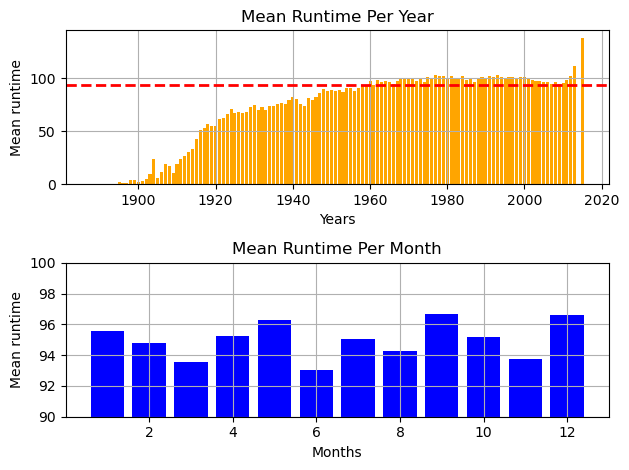

In [30]:
##RUN TIME FOR ALL YEARS

mean_runtime = dataframe3['Movie runtime'].mean()
mean_runtime_per_year = dataframe3.groupby('Movie release Year')['Movie runtime'].mean()
mean_runtime_per_month = df2.groupby('Movie release Month')['Movie runtime'].mean()

# Create the first subplot for the bar plot
plt.subplot(2, 1, 1)
plt.bar(mean_runtime_per_year.index, mean_runtime_per_year.values, color='orange')
plt.axhline(mean_runtime, color='red', linestyle='dashed', linewidth=2, label='Overall Mean Runtime')
plt.title('Mean Runtime Per Year')
plt.xlabel('Years')
plt.ylabel('Mean runtime')
plt.grid()

# Create the second subplot for the line plot
plt.subplot(2, 1, 2)
plt.bar(mean_runtime_per_month.index, mean_runtime_per_month.values, color='blue')
plt.title('Mean Runtime Per Month')
plt.xlabel('Months')
plt.ylabel('Mean runtime')
plt.ylim(90, 100)
plt.grid()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


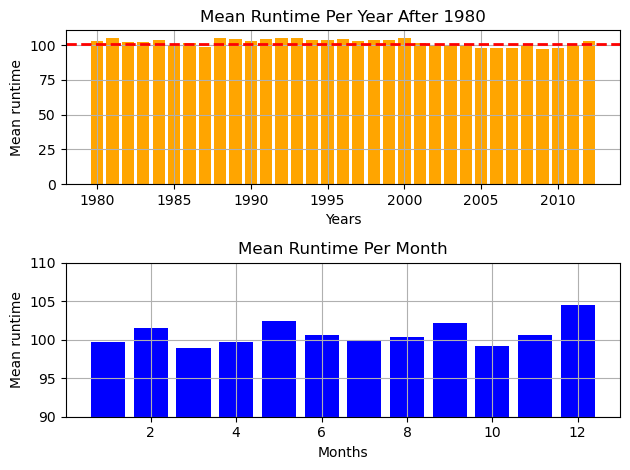

Movie release Month
1      99.713066
2     101.496633
3      98.975897
4      99.735091
5     102.410885
6     100.663590
7      99.962069
8     100.333808
9     102.193740
10     99.178318
11    100.636316
12    104.476858
Name: Movie runtime, dtype: float64


In [34]:
##RUN TIME FOR YEARS AFTER 1980

df22 = df22.dropna(subset=['Movie runtime'])
df22['Movie runtime'] = pd.to_numeric(df22['Movie runtime'], errors='raise')

df22 = df22[df22['Movie runtime'] <= 500]

mean_runtime = df22['Movie runtime'].mean()
mean_runtime_per_year = df22.groupby('Movie release Year')['Movie runtime'].mean()
mean_runtime_per_month = df22.groupby('Movie release Month')['Movie runtime'].mean()

# Create the first subplot for the bar plot
plt.subplot(2, 1, 1)
plt.bar(mean_runtime_per_year.index, mean_runtime_per_year.values, color='orange')
plt.axhline(mean_runtime, color='red', linestyle='dashed', linewidth=2, label='Overall Mean Runtime')
plt.title('Mean Runtime Per Year After 1980')
plt.xlabel('Years')
plt.ylabel('Mean runtime')
plt.grid()

# Create the second subplot for the line plot
plt.subplot(2, 1, 2)
plt.bar(mean_runtime_per_month.index, mean_runtime_per_month.values, color='blue')
plt.title('Mean Runtime Per Month')
plt.xlabel('Months')
plt.ylabel('Mean runtime')
plt.ylim(90, 110)
plt.grid()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

print(mean_runtime_per_month)


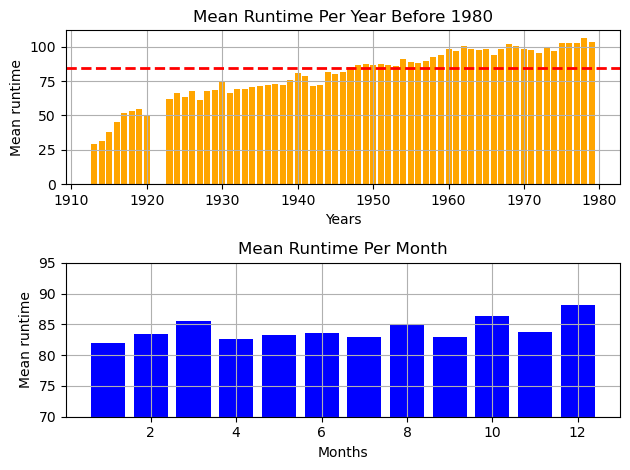

In [35]:
##RUNTIME FOR YEARS BEFORE 1980

df21 = df21.dropna(subset=['Movie runtime'])
df21['Movie runtime'] = pd.to_numeric(df21['Movie runtime'], errors='raise')

df21 = df21[df21['Movie runtime'] <= 500]

mean_runtime = df21['Movie runtime'].mean()
mean_runtime_per_year = df21.groupby('Movie release Year')['Movie runtime'].mean()
mean_runtime_per_month = df21.groupby('Movie release Month')['Movie runtime'].mean()

# Create the first subplot for the bar plot
plt.subplot(2, 1, 1)
plt.bar(mean_runtime_per_year.index, mean_runtime_per_year.values, color='orange')
plt.axhline(mean_runtime, color='red', linestyle='dashed', linewidth=2, label='Overall Mean Runtime')
plt.title('Mean Runtime Per Year Before 1980')
plt.xlabel('Years')
plt.ylabel('Mean runtime')
plt.grid()

# Create the second subplot for the line plot
plt.subplot(2, 1, 2)
plt.bar(mean_runtime_per_month.index, mean_runtime_per_month.values, color='blue')
plt.title('Mean Runtime Per Month')
plt.xlabel('Months')
plt.ylabel('Mean runtime')
plt.ylim(70, 95)
plt.grid()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
